## <center>Simple Linear Regression Assignment(delivery time)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Build a Simple Linear Regression Model for Predicting the Delivery time using the sorting time and performing the EDA and to do necessary transformations by choosing the best model.</code>

In [1]:
#Importing the necessary libraries for the model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from ml_metrics import rmse
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the csv file and having a glance at the data
Deliverytime = pd.read_csv('delivery_time.csv')
Deliverytime.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


#### Making necessary EDA for the model

In [3]:
#Checking for null values in the data
Deliverytime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#Checking for duplicate values and dropping them in the dataset
Deliverytime[Deliverytime.duplicated(keep = False)]

,Delivery Time,Sorting Time


In [5]:
#checking the correlation of the dataset
Deliverytime.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
#Inorder to avoid spacing columns are renamed
Deliverytime = Deliverytime.rename({'Delivery Time': 'Deliverytime','Sorting Time': 'Sortingtime'}, axis=1)
Deliverytime.head()

,Deliverytime,Sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='Sortingtime', ylabel='frequency'>

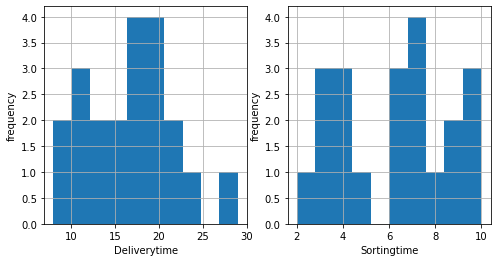

In [7]:
#checking the outliers if present in our dataset with the help of histogram plot
plt.figure(figsize = (8,4))

#outlier checking for deliverytime
plt.subplot(1,2,1)
plt.xlabel('Deliverytime')
plt.ylabel('frequency')
Deliverytime['Deliverytime'].hist()

#outlier checking for sorting time
plt.subplot(1,2,2)
plt.xlabel('Sortingtime')
plt.ylabel('frequency')
Deliverytime['Sortingtime'].hist()

<AxesSubplot:xlabel='Sortingtime', ylabel='Density'>

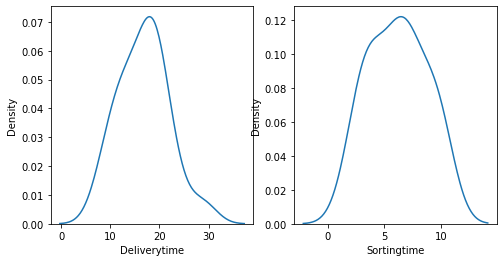

In [8]:
#checking if the data is Normally Distributed or not
plt.figure(figsize = (8,4))

#Normal distribution checking for delivery time
plt.subplot(1,2,1)
sns.kdeplot(Deliverytime['Deliverytime'])

#Normal distribution checking for sorting time
plt.subplot(1,2,2)
sns.kdeplot(Deliverytime['Sortingtime'])

## Building various models
#### <code style="background:salmon;color:black">Model1:Building the model without applying any transformation</code>

In [9]:
#building a linear model with the help of ordinary least square method(OLS) and fitting it
model1 = smf.ols('Deliverytime~Sortingtime', data = Deliverytime).fit()

<AxesSubplot:xlabel='Sortingtime', ylabel='Deliverytime'>

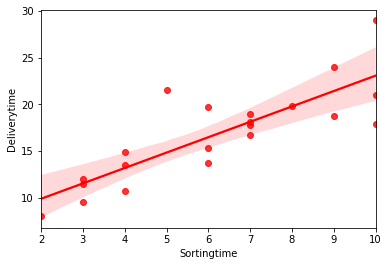

In [10]:
#Plotting the regression plot
sns.regplot(x="Sortingtime", y="Deliverytime", data = Deliverytime, color='red' )

In [11]:
#checking our intercept and slope values
model1.params

Intercept      6.582734
Sortingtime    1.649020
dtype: float64

In [12]:
#Looking into our tvalues and pvalues to check the significant values
print(model1.tvalues, '\n', model1.pvalues)

Intercept      3.823349
Sortingtime    6.387447
dtype: float64 
 Intercept      0.001147
Sortingtime    0.000004
dtype: float64


In [13]:
#Knowing how much our input data is contributing to the output data i.e rsquare and adjusted rsquare values
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [14]:
#finally looking into model summary 
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        13:13:43   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
Sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#Predicting the values from the built model
pred1 = model1.predict(Deliverytime.Sortingtime)
pred1.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [16]:
#actual data
actual_data = Deliverytime.Deliverytime

In [17]:
#checking our root mean square error from predicted data with respect to actual data
root1=rmse(pred1,actual_data)
root1

2.7916503270617654

#### <code style="background:salmon;color:black"> Model2:Building the model by applying log transformation on the independent data</code>

In [18]:
#building a log transform model with the help of ordinary least square method(OLS) and fitting it
model2 = smf.ols('Deliverytime~np.log(Sortingtime)', data = Deliverytime).fit()

In [19]:
#checking our intercept and slope values
model2.params

Intercept              1.159684
np.log(Sortingtime)    9.043413
dtype: float64

In [20]:
#looking into summary of the model
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           2.64e-06
Time:                        13:13:44   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#Predicting the values for the built model
pred2 = model2.predict(Deliverytime.Sortingtime)
pred2.head()

0    21.982913
1    13.696517
2    17.363305
3    21.030094
4    21.982913
dtype: float64

In [22]:
#checking our root mean square error from predicted data with respect to actual data
root2=rmse(pred2,actual_data)
root2

2.733171476682066

#### <code style="background:salmon;color:black">Model3:Building the model by applying  Exponential transformation on the independent data</code>

In [23]:
#building a Exponential tranform model with the help of ordinary least square method(OLS) and fitting it
model3 = smf.ols('Deliverytime~np.exp(Sortingtime)', data = Deliverytime).fit()

In [24]:
#checking our intercept and slope values
model3.params

Intercept              15.083578
np.exp(Sortingtime)     0.000393
dtype: float64

In [25]:
#looking into summary of the model
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Wed, 28 Jul 2021   Prob (F-statistic):            0.00396
Time:                        13:13:45   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(Sortingtime)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
#Predicting the values for the built model
pred3=model3.predict(Deliverytime.Sortingtime)
pred3.head()

0    23.739082
1    15.105033
2    15.242109
3    18.267760
4    23.739082
dtype: float64

In [27]:
#checking our root mean square error from predicted data with respect to actual data
root3=rmse(pred3,actual_data)
root3

3.958615702523664

#### <code style="background:salmon;color:black">Model4:Building the model by applying  Reciprocal transformation on the independent data</code>

In [28]:
#building a Reciprocal transform model with the help of ordinary least square method(OLS) and fitting it
model4 = smf.ols('Deliverytime~np.reciprocal(Sortingtime)', data = Deliverytime).fit()

In [29]:
#checking our intercept and slope values
model4.params

Intercept                     16.790952
np.reciprocal(Sortingtime)     0.000000
dtype: float64

In [30]:
#looking into summary of the model
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 28 Jul 2021   Prob (F-statistic):                nan
Time:                        13:13:45   Log-Likelihood:                -63.396
No. Observations:                  21   AIC:                             128.8
Df Residuals:                      20   BIC:                             129.8
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     16.7910      1.107     15.162      0.000      14.481      19.101
np.reciprocal(Sortingtime)          0          0        nan        nan           0           0
==============================================================================
Omnibus:                        0.864   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.374
Skew:                           0.327   Prob(JB):                        0.829
Kurtosis:                       2.974   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [31]:
#Predicting the values for the built model
pred4=model4.predict(Deliverytime.Sortingtime)
pred4.head()

0    16.790952
1    16.790952
2    16.790952
3    16.790952
4    16.790952
dtype: float64

In [32]:
#checking our root mean square error from predicted data with respect to actual data
root4=rmse(pred4,actual_data)
root4

4.95259614917066

#### <code style="background:salmon;color:black">Model5:Building the model by applying  Squareroot transformation on the independent data</code>

In [33]:
#building a Square root transform model with the help of ordinary least square method(OLS) and fitting it
model5 = smf.ols('Deliverytime~np.sqrt(Sortingtime)', data = Deliverytime).fit()

In [34]:
#checking our intercept and slope values
model5.params

Intercept              -2.518837
np.sqrt(Sortingtime)    7.936591
dtype: float64

In [35]:
#looking into summary of the model
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           2.61e-06
Time:                        13:13:46   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(Sortingtime)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Predicting the values for the built model
pred5 = (model5.predict(Deliverytime.Sortingtime))
pred5.head()

0    22.578867
1    13.354345
2    16.921761
3    21.290936
4    22.578867
dtype: float64

In [37]:
#checking our root mean square error from predicted data with respect to actual data
root5=rmse(pred5,actual_data)
root5

2.731543210091211

#### <code style="background:salmon;color:black">Model6:Building the model by applying  exponential transformation on the dependent data</code>

In [38]:
#building a Exponential transform on dependent model with the help of ordinary least square method(OLS) and fitting it
model6 = smf.ols('np.log(Deliverytime)~Sortingtime', data = Deliverytime).fit()

In [39]:
#checking our intercept and slope values
model6.params

Intercept      2.121372
Sortingtime    0.105552
dtype: float64

In [40]:
#looking into summary of the model
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Wed, 28 Jul 2021   Prob (F-statistic):           1.59e-06
Time:                          13:13:47   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
Sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
#Predicting the values for the built model
pred6 = np.exp(model6.predict(Deliverytime.Sortingtime))
pred6.head()

0    23.972032
1    12.725123
2    15.716034
3    21.570707
4    23.972032
dtype: float64

In [42]:
#checking our root mean square error from predicted data with respect to actual data
root6=rmse(pred6,actual_data)
root6

2.940250323056201

#### <code style="background:salmon;color:black">Model7:Building the model by applying  quadratic equation</code>

In [43]:
#Quadratic equation framing
Deliverytime["st_sqr"]=Deliverytime.Sortingtime*Deliverytime.Sortingtime
Deliverytime.head(5)

,Deliverytime,Sortingtime,st_sqr
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [44]:
#building a Quadratic equation model with the help of ordinary least square method(OLS) and fitting it
model7=smf.ols('Deliverytime~Sortingtime+st_sqr',data=Deliverytime).fit()

In [45]:
#looking into summary of the model
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Deliverytime   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           2.39e-05
Time:                        13:13:47   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.5222      4.160      0.847      0.408      -5.217      12.261
Sortingtime     2.8130      1.461      1.926      0.070      -0.256       5.882
st_sqr         -0.0932      0.115     -0.810      0.429      -0.335       0.149
==============================================================================
Omnibus:                        5.388   Durbin-Watson:                   1.345
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.393
Skew:                           0.943   Prob(JB):                        0.183
Kurtosis:                       3.563   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Predicting the values for the built model
pred7=model7.predict(Deliverytime)
pred7.head()

0    22.332430
1    13.283069
2    17.045108
3    21.290194
4    22.332430
dtype: float64

In [47]:
#checking our root mean square error from predicted data with respect to actual data
root7=rmse(pred7,actual_data)
root7

2.742148203780122

In [48]:
#Finally putting all the models rsquare values and rmse values into one frame
Conclusion={"Model":pd.Series(["Model1","Model2","Model3","Model4","Model5","Model6","Model7"]),
     "Rsquared":(model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared,model5.rsquared,model6.rsquared,model7.rsquared),
     "Adj Rsquared":(model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,model4.rsquared_adj,model5.rsquared_adj,model6.rsquared_adj,model7.rsquared_adj),
            "RMSE":(root1,root2,root3,root4,root5,root6,root7)
    }
Conclusion=pd.DataFrame(Conclusion)
Conclusion

,Model,Rsquared,Adj Rsquared,RMSE
0,Model1,0.682271,0.665549,2.791650
1,Model2,0.695443,0.679414,2.733171
2,Model3,0.361118,0.327492,3.958616
3,Model4,0.000000,0.000000,4.952596
4,Model5,0.695806,0.679796,2.731543
5,Model6,0.710948,0.695735,2.940250
6,Model7,0.693440,0.659377,2.742148


### Insights Drawn: 
>By Comparing all the seven models its assured that model6 is better to predict the Delivery Time because the model6 has better Rsquare and Adjusted Rsquare value compared to other models and even the RMSE value is also almost less.